   # Explanatory Data Analysis & Data Presentation

### Research Questions

1. The best and the worst movies
2. Find your next Movies
3. Most Successful Franchises
4. Most Successful Directors
5. Most Successful Actors
6. What are the most common Words in Movie Titles, Taglines and Overviews?

### Hypothesis

Franchises are more successful than stand-alone.

### About Movies Dataset

__Features__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).
* **director:** Director of the movie.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import HTML

C:\Users\palab\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Pandas Display Settings

In [2]:
pd.options.display.max_colwidth = 600
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

### Data Import and first Inspection

In [3]:
df = pd.read_csv("movies_complete2.csv", parse_dates= ["release_date"])

In [4]:
df.head(2)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",English,<img src='http://image.tmdb.org/t/p/w185//rhIRbceoE9lR4veEXuwCC2wARtG.jpg' style='height:100px;'>,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Communications,United States of America,2413.00,6.90,17.02,104.00,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",English|Français,<img src='http://image.tmdb.org/t/p/w185//vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg' style='height:100px;'>,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup|Leonard Zola|Lloyd Berry|Malcolm Stewart|Annabel Kershaw|Darryl Henriques|Robyn Driscoll|Peter Bryant|Sarah Gilson|Florica Vlad|June Lion|Brenda Lockmuller,26,16,Joe Johnston


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [6]:
df.describe()

,id,release_date,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,44657,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,1992-04-28 16:30:02.539355520,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
min,2.00,1874-12-09 00:00:00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,1978-08-12 00:00:00,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,2001-08-16 00:00:00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,2010-12-10 00:00:00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,2017-12-27 00:00:00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00
std,111806.36,NaN,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89


In [7]:
df.describe(include = "object")

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44442,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg' style='height:100px;'>,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,5,24,66


## The best and the worst movies

In [8]:
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd","vote_count", "vote_average", "popularity"]].copy()

df_best["profit_musd"] = df.revenue_musd.sub(df.budget_musd)
df_best["return"] = df.revenue_musd.div(df.budget_musd)
df_best.head()

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//rhIRbceoE9lR4veEXuwCC2wARtG.jpg' style='height:100px;'>,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg' style='height:100px;'>,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg' style='height:100px;'>,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg' style='height:100px;'>,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//e64sOI48hQXyru7naBFyssKFxVd.jpg' style='height:100px;'>,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,NaN,NaN


In [9]:
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes", "Average Rating", "Popularity", "Profit", "ROI"]

df_best.set_index("Title", inplace = True)
df_best.head()

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//rhIRbceoE9lR4veEXuwCC2wARtG.jpg' style='height:100px;'>,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg' style='height:100px;'>,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg' style='height:100px;'>,NaN,NaN,92.00,6.50,11.71,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg' style='height:100px;'>,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//e64sOI48hQXyru7naBFyssKFxVd.jpg' style='height:100px;'>,NaN,76.58,173.00,5.70,8.39,NaN,NaN


In [10]:
df_best.Budget.fillna(0, inplace = True)
df_best.Votes.fillna(0, inplace = True)

In [11]:
def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0):    
    df2 = df_best.loc[(df_best.Budget >= min_bud) & (df_best.Votes >= min_votes), ["", by]]\
    .sort_values(by = by, ascending = ascending).head(n).copy()
    return HTML(df2.to_html(escape=False))

__Movies Top 5 - Highest Revenue__

In [12]:
best_worst(n = 5, by = "Revenue")

,,Revenue
Title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


__Movies Top 5 - Lowest Revenue__

In [13]:
best_worst(n = 5, by = "Revenue",ascending=True)

,,Revenue
Title,,
Mute Witness,,0.00
A Cry in the Wild,,0.00
The Wind in the Willows,,0.00
Missing,,0.00
The Letters,,0.00


__Movies Top 5 - Highest Budget__

In [14]:
best_worst(5, "Budget")

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Transformers: The Last Knight,,260.00


__Movies Top 5 - Lowest Budget__

In [15]:
best_worst(n = 5, by = "Budget",ascending=True)

,,Budget
Title,,
Forced to Kill,,0.00
"It's Me, Hilary: The Man Who Drew Eloise",,0.00
The Revengers,,0.00
The Surrealist and His Naughty Hand,,0.00
Sylvia,,0.00


__Movies Top 5 - Highest Profit__

In [16]:
best_worst(5, "Profit")

,,Profit
Title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


__Movies Top 5 - Lowest Profit__

In [17]:
best_worst(5, "Profit", ascending = True)

,,Profit
Title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


__Movies Top 5 - Highest ROI__

In [18]:
best_worst(5, "ROI", min_bud = 50)

,,ROI
Title,,
Minions,,15.63
Jurassic Park,,14.60
The Twilight Saga: New Moon,,14.20
Deadpool,,13.50
Despicable Me 2,,12.77


__Movies Top 5 - Lowest ROI__

In [19]:
best_worst(5, "ROI", ascending = True, min_bud = 100)

,,ROI
Title,,
The Adventures of Pluto Nash,,0.07
The Alamo,,0.18
Live by Night,,0.21
Mars Needs Moms,,0.26
The Lone Ranger,,0.35


__Movies Top 5 - Most Votes__

In [20]:
best_worst(5, "Votes")

,,Votes
Title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


__Movies Top 5 - Least Votes__

In [21]:
best_worst(n = 5, by = "Votes",ascending=True)

,,Votes
Title,,
Queerama,,0.00
The Fiend of Dope Island,,0.00
Souls at Sea,,0.00
Getting Gertie's Garter,,0.00
Don't Tell the Wife,,0.00


__Movies Top 5 - Highest Rating__

In [22]:
best_worst(5, "Average Rating", min_votes = 50)

,,Average Rating
Title,,
Planet Earth II,,9.50
Dilwale Dulhania Le Jayenge,,9.10
Planet Earth,,8.80
Sansho the Bailiff,,8.70
The Jinx: The Life and Deaths of Robert Durst,,8.60


__Movies Top 5 - Lowest Rating__

In [23]:
best_worst(5, "Average Rating", ascending = True, min_votes = 20, min_bud = 20)

,,Average Rating
Title,,
Foodfight!,,2.30
Dragonball Evolution,,2.90
Battlefield Earth,,3.00
Disaster Movie,,3.10
Alone in the Dark,,3.10


__Movies Top 5 - Most Popular__

In [24]:
best_worst(5, "Popularity")

,,Popularity
Title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


__Movies Top 5 - Least Popular__

In [25]:
best_worst(n = 5, by = "Popularity",ascending=True)

,,Popularity
Title,,
Dead Kennedys: The Early Years,,0.00
Breaking with Old Ideas,,0.00
Kiljusen herrasväki,NaN,0.00
La Bionda,,0.00
Pleasure Party,,0.00


## Find your next Movie

__Search 1: Science Fiction Action Movie with Bruce Willis (high Rating)__

In [26]:
mask_genres = df.genres.str.contains("Action") & df.genres.str.contains("Science Fiction")
mask_actor = df.cast.str.contains("Bruce Willis")

In [27]:
df.loc[mask_actor & mask_genres, ["title", "vote_average"]].sort_values(by = "vote_average", ascending = False)

,title,vote_average
1448,The Fifth Element,7.30
19218,Looper,6.60
1786,Armageddon,6.50
14135,Surrogates,5.90
20333,G.I. Joe: Retaliation,5.40
27619,Vice,4.10


In [28]:
bruce = df.loc[mask_actor & mask_genres, ["title", "poster_path", "vote_average"]]\
            .sort_values(by = "vote_average", ascending = False).set_index("title")

In [29]:
HTML(bruce.to_html(escape=False))

,poster_path,vote_average
title,,
The Fifth Element,,7.30
Looper,,6.60
Armageddon,,6.50
Surrogates,,5.90
G.I. Joe: Retaliation,,5.40
Vice,,4.10


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (low runtime)__

In [30]:
mask_director = (df.director == "Quentin Tarantino")
mask_actor = df.cast.str.contains("Uma Thurman")

In [31]:
quentin = df.loc[mask_director & mask_actor, ["title", "poster_path", "runtime"]]\
            .sort_values(by = "runtime").set_index("title")

In [32]:
HTML(quentin.to_html(escape=False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.00
Kill Bill: Vol. 2,,136.00
Pulp Fiction,,154.00


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (high Revenue)__

In [33]:
mask_studio = df.production_companies.str.contains("Pixar").fillna(False)
mask_time = df.release_date.between("2010-01-01", "2015-12-31")

In [34]:
pixar = df.loc[mask_studio & mask_time, ["title", "poster_path", "revenue_musd", "release_date"]]\
            .sort_values(by = "revenue_musd", ascending = False).set_index("title")

In [35]:
HTML(pixar.head().to_html(escape=False))

,poster_path,revenue_musd,release_date
title,,,
Toy Story 3,,1066.97,2010-06-16
Inside Out,,857.61,2015-06-09
Monsters University,,743.56,2013-06-20
Cars 2,,559.85,2011-06-11
Brave,,538.98,2012-06-21


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent)__

In [36]:
mask_genre = df.genres.str.contains("Action") | df.genres.str.contains("Thriller")
mask_lan = df.original_language == "en"
mask_vote_av = df.vote_average >= 7.5
mask_vote_co = df.vote_count >= 10

In [37]:
next_mov = df.loc[mask_genre & mask_lan & mask_vote_av & mask_vote_co, 
                  ["title", "poster_path", "genres", "vote_average", "vote_count", "release_date"]]\
                    .sort_values(by = "release_date", ascending = False).set_index("title").head(20)

In [38]:
HTML(next_mov.head().to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.50,171.00,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.50,2712.00,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.60,84.00,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.60,4858.00,2017-04-19
Logan,,Action|Drama|Science Fiction,7.60,6310.00,2017-02-28


## Testing Hypothesis

In [39]:
df["Franchise"] = df.belongs_to_collection.notna()

In [40]:
df.Franchise.value_counts()

Franchise
False    40228
True      4463
Name: count, dtype: int64

__Franchise vs. Stand-alone: Average Revenue__

In [41]:
df.groupby("Franchise").revenue_musd.mean()

Franchise
False    44.74
True    165.71
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability__

In [42]:
df["ROI"] = df.revenue_musd.div(df.budget_musd)

In [43]:
df.groupby("Franchise").ROI.median()

Franchise
False   1.62
True    3.71
Name: ROI, dtype: float64

__Franchise vs. Stand-alone: Average Budget__

In [44]:
df.groupby("Franchise").budget_musd.mean()

Franchise
False   18.05
True    38.32
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [45]:
df.groupby("Franchise").popularity.mean()

Franchise
False   2.59
True    6.25
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [46]:
df.groupby("Franchise").vote_average.mean()

Franchise
False   6.01
True    5.96
Name: vote_average, dtype: float64

In [47]:
df.groupby("Franchise").agg({"budget_musd": "mean", "revenue_musd": "mean", "vote_average": "mean",
                            "popularity": "mean", "ROI":"median", "vote_count":"mean"})

,budget_musd,revenue_musd,vote_average,popularity,ROI,vote_count
Franchise,,,,,,
False,18.05,44.74,6.01,2.59,1.62,78.29
True,38.32,165.71,5.96,6.25,3.71,412.39


## Most Successful Franchises

In [48]:
franchises = df.groupby("belongs_to_collection").agg({"title":"count", "budget_musd": ["sum", "mean"], 
                                                      "revenue_musd": ["sum", "mean"],
                                                      "vote_average": "mean", "popularity": "mean",
                                                      "ROI":"median", 
                                                      "vote_count":"mean"})

In [49]:
franchises.head(10)

title budget_musd       revenue_musd   
                                        count         sum  mean          sum   
belongs_to_collection                                                          
... Has Fallen Collection                   2      130.00 65.00       366.78  \
00 Schneider Filmreihe                      1        0.00   NaN         0.00   
08/15 Collection                            1        0.00   NaN         0.00   
100 Girls Collection                        2        0.00   NaN         0.00   
101 Dalmatians (Animated) Collection        2        4.00  4.00       215.88   
101 Dalmatians (Live-Action) Collection     2      139.00 69.50       504.30   
12 Rounds Collection                        3       24.00 12.00        17.28   
1920 Collection                             2        0.00   NaN         0.00   
2 Days In... Collection                     2        8.00  8.00        21.43   
2001 Maniacs Collection                     1        3.00  3.00         0.00   

                                               vote_average popularity    ROI   
                                          mean         mean       mean median   
belongs_to_collection                                                           
... Has Fallen Collection               183.39         6.00      13.01   2.86  \
00 Schneider Filmreihe                     NaN         6.50       1.93    NaN   
08/15 Collection                           NaN         5.90       0.63    NaN   
100 Girls Collection                       NaN         5.15       3.08    NaN   
101 Dalmatians (Animated) Collection    215.88         6.25      13.06  53.97   
101 Dalmatians (Live-Action) Collection 252.15         5.35       9.57   4.05   
12 Rounds Collection                     17.28         5.30       7.91   0.86   
1920 Collection                            NaN         5.40       1.06    NaN   
2 Days In... Collection                  10.71         5.85       5.67   0.21   
2001 Maniacs Collection                    NaN         4.90       4.62    NaN   

                                        vote_count  
                                              mean  
belongs_to_collection                               
... Has Fallen Collection                  2333.00  
00 Schneider Filmreihe                       16.00  
08/15 Collection                              4.00  
100 Girls Collection                         64.00  
101 Dalmatians (Animated) Collection        937.00  
101 Dalmatians (Live-Action) Collection     524.50  
12 Rounds Collection                        121.67  
1920 Collection                               6.00  
2 Days In... Collection                     100.00  
2001 Maniacs Collection                      70.00

In [50]:
franchises.nlargest(5, ("title", "count"))

title budget_musd       revenue_musd          
                              count         sum  mean          sum   mean   
belongs_to_collection                                                       
The Bowery Boys                  29        0.00   NaN         0.00    NaN  \
Totò Collection                  27        0.00   NaN         0.00    NaN   
James Bond Collection            26     1539.65 59.22      7106.97 273.35   
Zatôichi: The Blind Swordsman    26        0.00   NaN         0.00    NaN   
The Carry On Collection          25        0.00   NaN         0.00    NaN   

                              vote_average popularity    ROI vote_count  
                                      mean       mean median       mean  
belongs_to_collection                                                    
The Bowery Boys                       6.67       0.20    NaN       0.72  
Totò Collection                       6.84       1.05    NaN      18.04  
James Bond Collection                 6.34      13.45   6.13    1284.31  
Zatôichi: The Blind Swordsman         6.40       1.10    NaN      11.19  
The Carry On Collection               6.17       3.22    NaN      21.04

In [51]:
franchises.nlargest(5, ("revenue_musd", "mean"))

title budget_musd        revenue_musd           
                        count         sum   mean          sum    mean   
belongs_to_collection                                                   
Avatar Collection           1      237.00 237.00      2787.97 2787.97  \
The Avengers Collection     2      500.00 250.00      2924.96 1462.48   
Frozen Collection           2      150.00 150.00      1274.22 1274.22   
Finding Nemo Collection     2      294.00 147.00      1968.91  984.45   
The Hobbit Collection       3      750.00 250.00      2935.52  978.51   

                        vote_average popularity    ROI vote_count  
                                mean       mean median       mean  
belongs_to_collection                                              
Avatar Collection               7.20     185.07  11.76   12114.00  
The Avengers Collection         7.35      63.63   5.96    9454.00  
Frozen Collection               7.10      16.88   8.49    3035.00  
Finding Nemo Collection         7.20      19.99   7.57    5312.50  
The Hobbit Collection           7.23      25.21   3.83    5981.33

In [52]:
franchises.nlargest(5, ("budget_musd", "mean"))

title budget_musd        revenue_musd   
                                    count         sum   mean          sum   
belongs_to_collection                                                       
Tangled Collection                      2      260.00 260.00       591.79  \
Pirates of the Caribbean Collection     5     1250.00 250.00      4521.58   
The Avengers Collection                 2      500.00 250.00      2924.96   
The Hobbit Collection                   3      750.00 250.00      2935.52   
Man of Steel Collection                 2      475.00 237.50      1536.11   

                                            vote_average popularity    ROI   
                                       mean         mean       mean median   
belongs_to_collection                                                        
Tangled Collection                   591.79         7.25      12.32   2.28  \
Pirates of the Caribbean Collection  904.32         6.88      53.97   3.45   
The Avengers Collection             1462.48         7.35      63.63   5.96   
The Hobbit Collection                978.51         7.23      25.21   3.83   
Man of Steel Collection              768.05         6.10      24.99   3.22   

                                    vote_count  
                                          mean  
belongs_to_collection                           
Tangled Collection                     1901.00  
Pirates of the Caribbean Collection    5016.00  
The Avengers Collection                9454.00  
The Hobbit Collection                  5981.33  
Man of Steel Collection                6825.50

In [53]:
franchises[franchises[("vote_count", "mean")] >=1000].nlargest(5, ("vote_average", "mean"))

title budget_musd        revenue_musd          
                                 count         sum   mean          sum   mean   
belongs_to_collection                                                           
The Lord of the Rings Collection     3      266.00  88.67      2916.54 972.18  \
The Godfather Collection             3       73.00  24.33       429.38 143.13   
Blade Runner Collection              1       28.00  28.00        33.14  33.14   
The Man With No Name Collection      3        2.00   0.67        35.50  11.83   
The Dark Knight Collection           3      585.00 195.00      2463.72 821.24   

                                 vote_average popularity    ROI vote_count  
                                         mean       mean median       mean  
belongs_to_collection                                                       
The Lord of the Rings Collection         8.03      30.27  11.73    8253.00  
The Godfather Collection                 7.97      31.64   3.66    3677.00  
Blade Runner Collection                  7.90      96.27   1.18    3833.00  
The Man With No Name Collection          7.83      14.17  25.00    1422.67  
The Dark Knight Collection               7.80      57.42   4.34    9681.00

## Most Successful Directors

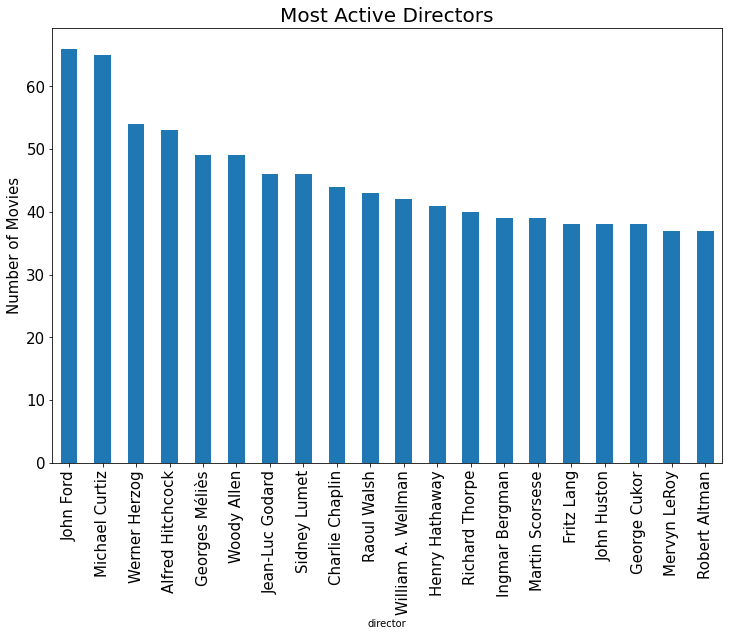

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize = (12, 8))
df.director.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
plt.show()
sns.despine()

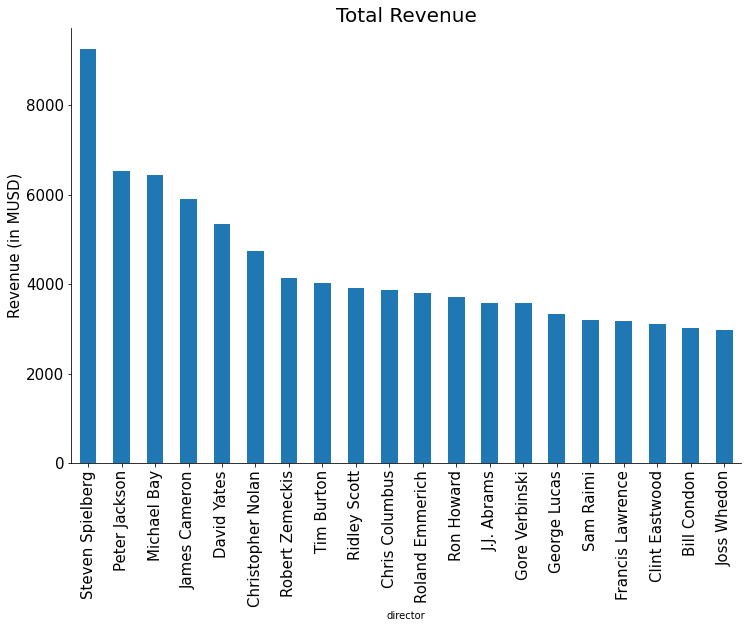

In [55]:
plt.figure(figsize = (12, 8))
df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
sns.despine()
plt.show()

In [56]:
df.genres = df.genres.astype(str)

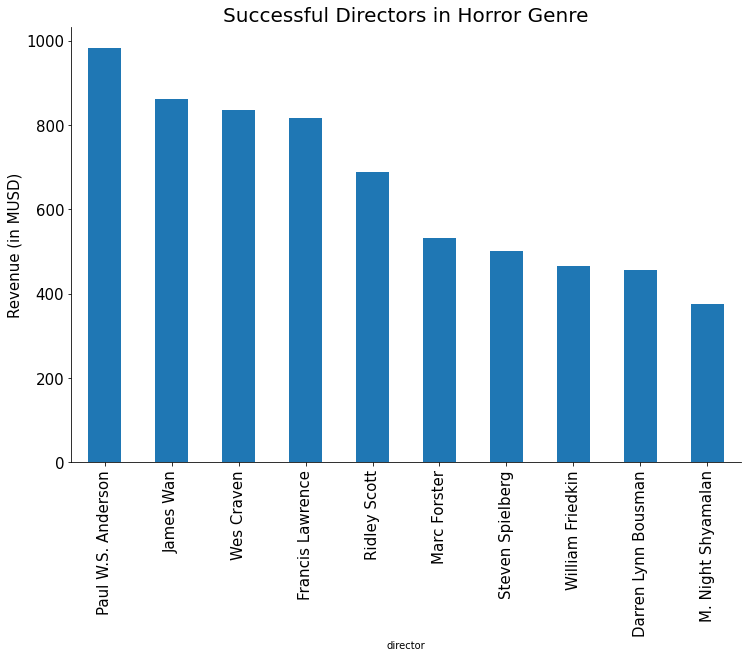

In [57]:
plt.figure(figsize = (12, 8))
df.loc[df.genres.str.contains("Horror")].groupby("director").revenue_musd.sum().nlargest(10).plot(kind='bar', fontsize = 15)
plt.title("Successful Directors in Horror Genre",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
sns.despine()
plt.show()

## Most Successful Actors

In [58]:
df.set_index("id", inplace = True)

In [59]:
act = df.cast.str.split("|", expand = True)
act.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [60]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [61]:
act.head()

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn


In [62]:
act.columns = ["Actor"]

In [63]:
act = act.merge(df[["title", "revenue_musd", "vote_average", "popularity"]],
                how = "left", left_index = True, right_index = True)

In [64]:
act.head()

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,NaN,7.10,3.86
2,Susanna Haavisto,Ariel,NaN,7.10,3.86
2,Matti Pellonpää,Ariel,NaN,7.10,3.86
2,Eetu Hilkamo,Ariel,NaN,7.10,3.86
3,Matti Pellonpää,Shadows in Paradise,NaN,7.10,2.29


In [65]:
act.Actor.value_counts().head(5)

Actor
Bess Flowers         240
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    122
Michael Caine        110
Name: count, dtype: int64

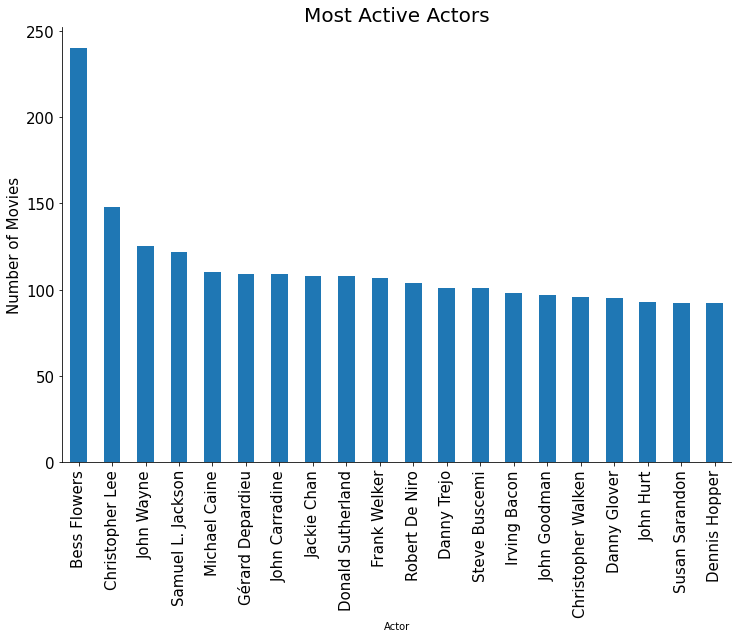

In [66]:
plt.figure(figsize = (12, 8))
act.Actor.value_counts().head(20).plot(kind='bar', fontsize = 15)
plt.title("Most Active Actors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 15)
sns.despine()
plt.show()

In [67]:
agg = act.groupby("Actor").agg(Total_Revenue = ("revenue_musd", "sum"), 
                               Mean_Revenue = ("revenue_musd", "mean"),
                               Mean_Rating = ("vote_average", "mean"), 
                               Mean_Pop = ("popularity", "mean"), 
                               Total_Movies = ("Actor", "count"))

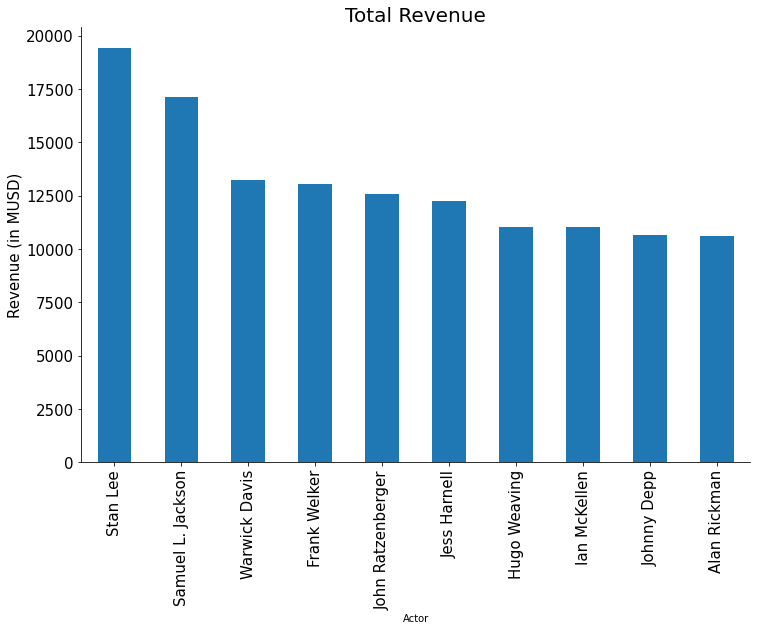

In [68]:
plt.figure(figsize = (12, 8))
agg.Total_Revenue.nlargest(10).plot(kind='bar', fontsize = 15)
plt.title("Total Revenue",fontsize = 20)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
sns.despine()
plt.show()

## What are the most common Words in Movie Titles, Taglines and Overviews?

In [69]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [70]:
title_corpus = ' '.join(title)
overview_corpus = ' '.join(overview)
tagline_corpus = ' '.join(tagline)

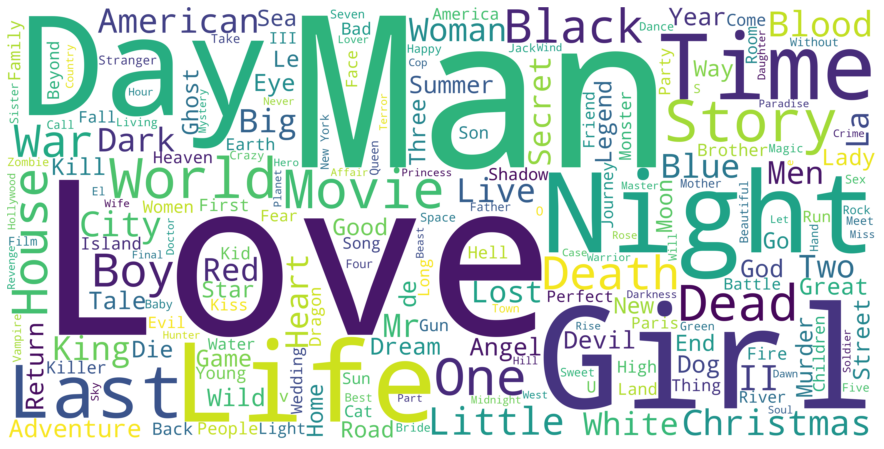

In [71]:
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, max_words= 200).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

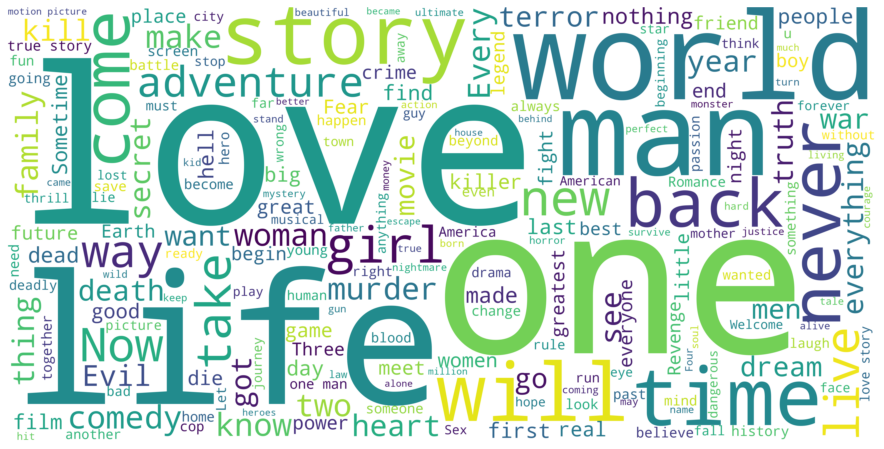

In [72]:
tagline_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

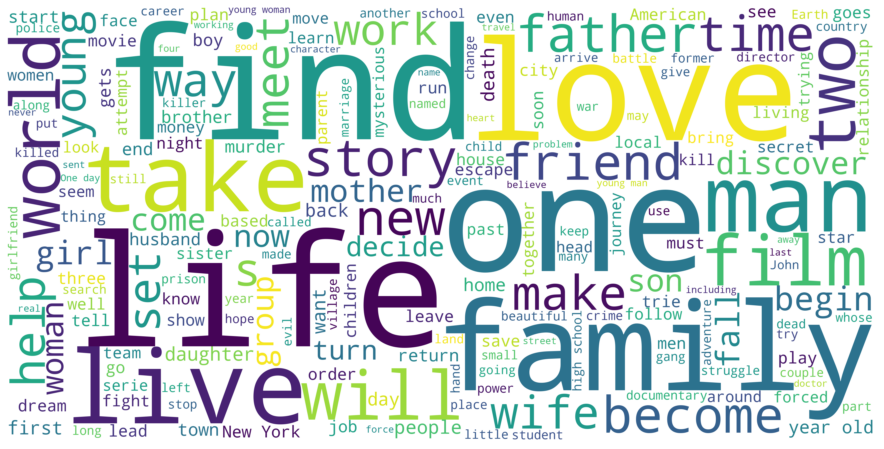

In [73]:
overview_wordcloud = WordCloud(background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()